In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import Image

# Load

In [2]:
data = pd.read_csv('Data/insurance.csv')

In [3]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Data Overview

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No NaN values in this data set

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Column "charges" shows high std

# EDA

## Which age group is charged the most?

In [8]:
data['Age_Bin'] = pd.cut(data['age'], bins=5, precision=0)

In [9]:
data['Age_Bin_str'] = data['Age_Bin'].astype(str).str.replace("(", "").str.replace("]", "").str.replace(", ", "-").str.replace(".0", "")+" years"

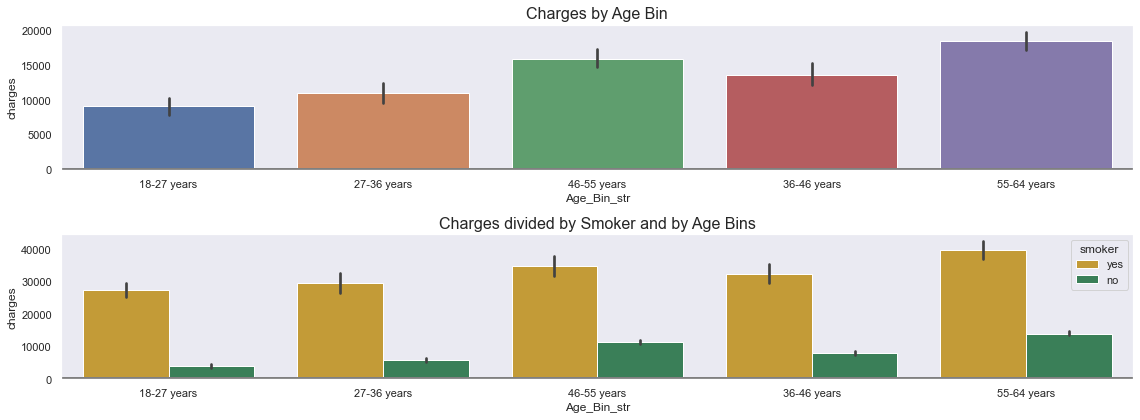

In [10]:
fig, axs = plt.subplots(2, figsize=(16,6))
axs[0].grid()
axs[0].axhline(y=0, color='grey', linewidth=4) 
axs[0].set_title('Charges by Age Bin', fontsize=16)
sns.barplot(x=data['Age_Bin_str'], y=data['charges'], ax=axs[0])

axs[1].grid()
axs[1].axhline(y=0, color='grey', linewidth=4) 
axs[1].set_title('Charges divided by Smoker and by Age Bins', fontsize=16)
sns.barplot(x=data['Age_Bin_str'], y=data['charges'], hue=data['smoker'], palette={'yes':'goldenrod', 'no':'seagreen'}, ax=axs[1])

plt.tight_layout()
plt.show()

* As expected, with the increase in age, the charges raise
* Smoking seems to have a substantial influence on the charges

## Influence of Smoking in Detail

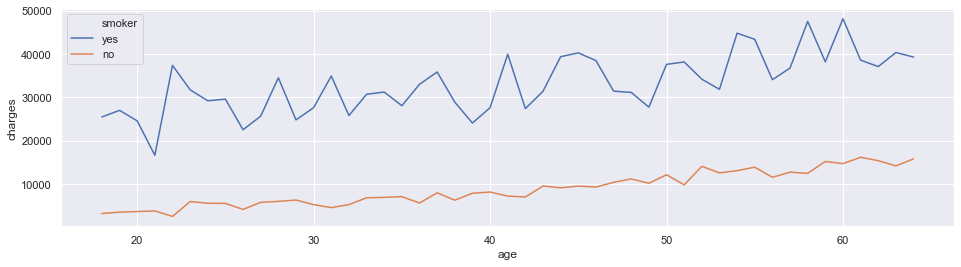

In [11]:
plt.figure(figsize=(16,4))
sns.lineplot(x='age', y='charges', data=data, hue='smoker', err_style=None)
plt.show()

* The charges for the youngest people who smoke, are higher than the charges for the oldest people who don't

## Who smokes more?

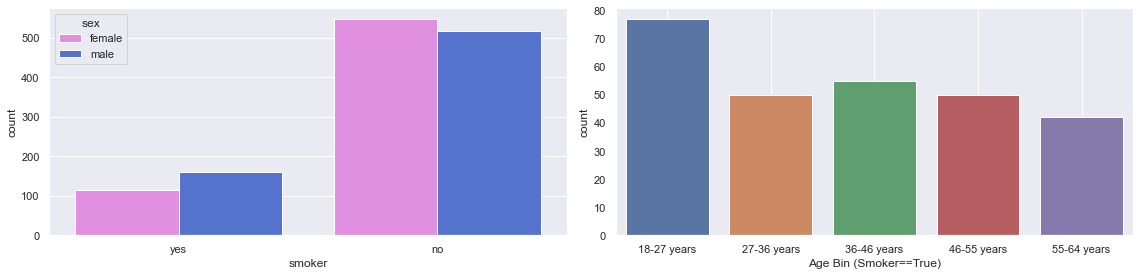

In [12]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(x=data['smoker'], hue=data['sex'], palette={'male':'royalblue', 'female':'violet'})

f.add_subplot(1,2,2)
data_smoker = data.query('smoker == "yes"')
order = data_smoker['Age_Bin_str'].value_counts().sort_index().index
sns.countplot(x=data_smoker['Age_Bin_str'], order=order)
plt.xlabel('Age Bin (Smoker==True)')

plt.grid()
plt.tight_layout()
plt.show()

* The youngest generation has the most smokers
* Men in general smoke slightly more than women

In [13]:
filt_young_smokers = (data['Age_Bin_str']=="18-27 years") & (data['smoker']=='yes')
df_young_smokers = data.loc[filt_young_smokers]

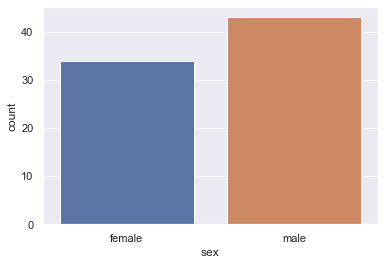

In [14]:
sns.countplot(df_young_smokers['sex'])
plt.show()

* In the youngest age group men also smoke slightly more than women
* The distribution seems to follow the general distribution of male and female smokers 

## Where are people charged the most?

In [15]:
values = data.groupby('region')['charges'].mean()
colors=['lightblue', 'lightgreen', 'bisque', 'lightcoral']

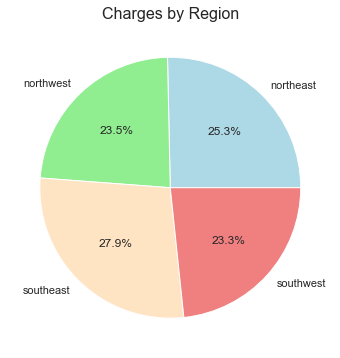

In [16]:
plt.figure(figsize=(6,6))
plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=colors)
plt.title('Charges by Region', {'fontsize':16})
plt.show()

* Charges in the **Southeast** region are the highest followed by **Northeast*
* **Northwest** and **Southwest** are nearly the same

## Is bmi a critical factor?

**Here are the BMI Categories from the WHO (Wikipedia):**

<img src="img/bmi-groups-wikipedia.png" width="300" height="300" style="float:left"/>

* Change the groups so that there is only one underweight group

In [17]:
def bmi_categorizer(bmi):
    if (bmi < 18.5):
        return "Underweight"
    elif (bmi >= 18.5) and (bmi < 25):
        return "Normal weight"
    elif (bmi >= 25) and (bmi < 30):
        return "Overweight"
    elif (bmi >= 30) and (bmi < 35):
        return "Obese 1"
    elif (bmi >= 35) and (bmi < 40):
        return "Obese 2"
    elif (bmi >= 40):
        return "Obese 3"

In [18]:
data['BMI_Category'] = data['bmi'].apply(bmi_categorizer)

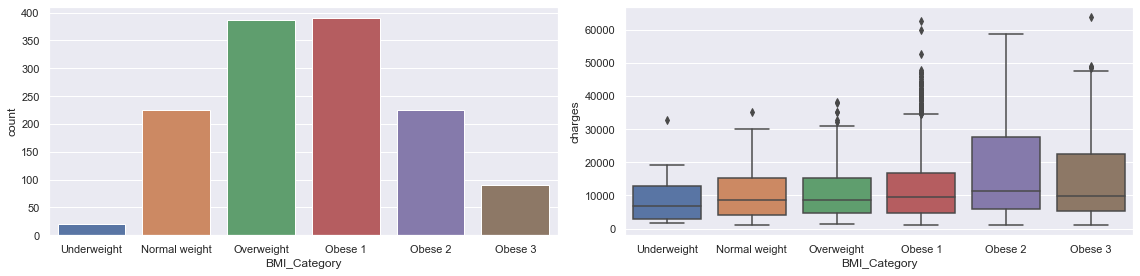

In [19]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(data['BMI_Category'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
f.add_subplot(1,2,2)
sns.boxplot(x=data['BMI_Category'], y=data['charges'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
plt.tight_layout()
plt.show()

* This dataset contains more people in Overweight/Obese BMI categories
* People in Obese BMI categories have higher charges, especially Obese 2 and Obese 3
* Charges for the Overweight category are almost identical to the Normal weight category

## What is the influence of children on the charges?

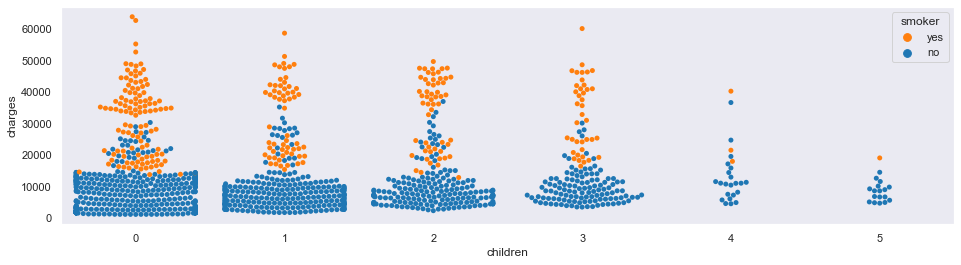

In [20]:
plt.figure(figsize=(16,4))
sns.swarmplot(x='children', y='charges',
              data=data, hue='smoker',
              palette={'yes':'tab:orange', 'no':'tab:blue'}, edgecolor="gray")
plt.grid(b=False)
plt.show()

* Children seem not to influence the charges 
* Groups with 4 and more children are significantly smaller

## Who lives the unhealthiest livestyle?

In [21]:
def get_livestyle(smoker, bmi_cat):
    if (smoker=='no') & (bmi_cat == 'Normal weight'):
        return 'Healthy'
    else:
        return 'Unhealthy'

In [22]:
data['livestyle'] = data.apply(lambda x: get_livestyle(x['smoker'], x['BMI_Category']), axis=1)

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Age_Bin,Age_Bin_str,BMI_Category,livestyle
0,19,female,27.900,0,yes,southwest,16884.92400,"(18.0, 27.0]",18-27 years,Overweight,Unhealthy
1,18,male,33.770,1,no,southeast,1725.55230,"(18.0, 27.0]",18-27 years,Obese 1,Unhealthy
2,28,male,33.000,3,no,southeast,4449.46200,"(27.0, 36.0]",27-36 years,Obese 1,Unhealthy
3,33,male,22.705,0,no,northwest,21984.47061,"(27.0, 36.0]",27-36 years,Normal weight,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,"(27.0, 36.0]",27-36 years,Overweight,Unhealthy


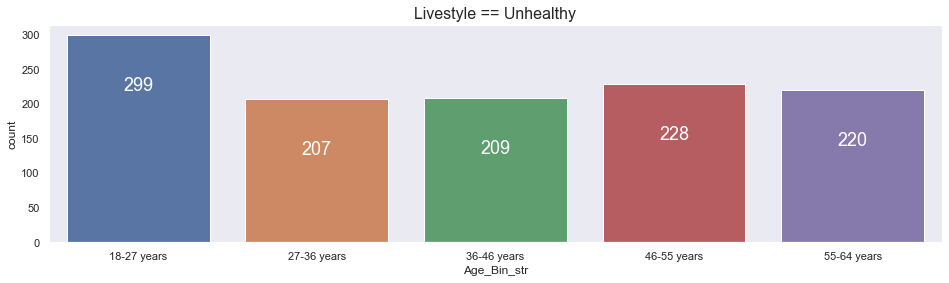

In [24]:
order = data['Age_Bin_str'].value_counts().sort_index().index
plt.figure(figsize=(16,4))

ax = sns.countplot(x='Age_Bin_str', order=order, data=data[data['livestyle']=='Unhealthy'])
for p in ax.patches:
    ax.annotate(f'\n\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
ax.grid(b=False)
ax.set_title("Livestyle == Unhealthy", fontsize=16)
plt.show()

* The youngest group lives the most unhealthy livestyle

## In which region live the unhealthiest people?

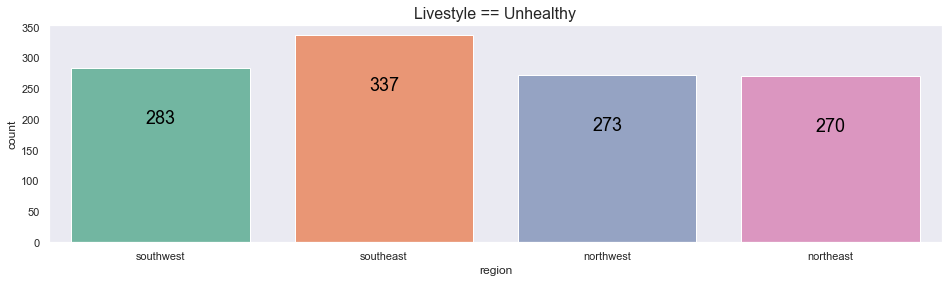

In [25]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x='region', data=data[data['livestyle']=='Unhealthy'], palette='Set2')
for p in ax.patches:
    ax.annotate(f'\n\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=18)
ax.grid(b=False)
ax.set_title("Livestyle == Unhealthy", fontsize=16)
plt.show()

* In the southeast live the most unhealthy people
* The average charges in the southeast were also the highest

## Charges Healthy vs Unhealthy

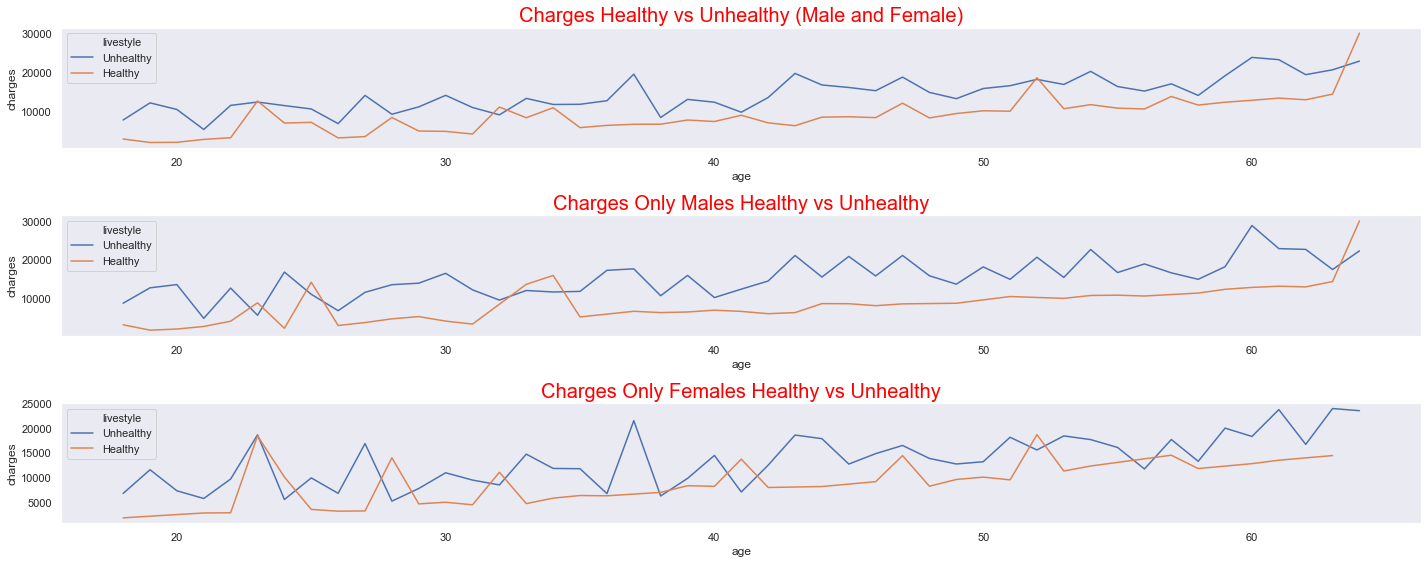

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,8))
sns.lineplot(x='age', y='charges', hue='livestyle', data=data, err_style=None, ax=ax1)
ax1.set_title('Charges Healthy vs Unhealthy (Male and Female)', fontsize=20, color='Red')
ax1.grid(b=False)

sns.lineplot(x='age', y='charges', hue='livestyle', data=data[data['sex']=='male'], err_style=None, ax=ax2)
ax2.set_title('Charges Only Males Healthy vs Unhealthy', fontsize=20, color='Red')
ax2.grid(b=False)

sns.lineplot(x='age', y='charges', hue='livestyle', data=data[data['sex']=='female'], err_style=None, ax=ax3)
ax3.set_title('Charges Only Females Healthy vs Unhealthy', fontsize=20, color='Red')
ax3.grid(b=False)

plt.grid(b=False)
plt.tight_layout()
plt.show()

* At first glance, it seems that the costs are higher for healthy women than for healthy men - needs further investigation
* Healthy males have from around age 35 a steady increase, while healthy females have certain steep increases
* In some cases the line of the healthy exceeds the line of the unhealthy
* The linechart of unhealthy females shows large deviations

## Male vs. Female

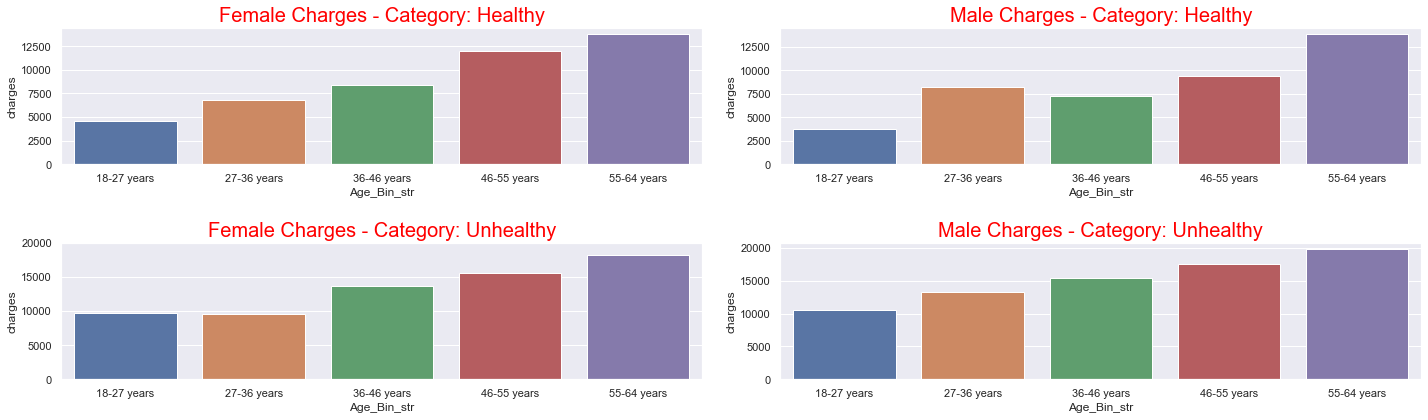

In [27]:
female_df = data.loc[data['sex']=='female']
male_df = data.loc[data['sex']=='male']
order = data['Age_Bin_str'].value_counts().sort_index().index

fig, axs = plt.subplots(2,2, figsize=(20,6))

sns.barplot(x='Age_Bin_str', y='charges', data=female_df[female_df['livestyle']=='Healthy'], order=order, ax=axs[0, 0], ci=None)
axs[0, 0].set_title('Female Charges - Category: Healthy', fontsize=20, color='Red')

sns.barplot(x='Age_Bin_str', y='charges', data=male_df[male_df['livestyle']=='Healthy'], order=order, ax=axs[0, 1], ci=None)
axs[0, 1].set_title('Male Charges - Category: Healthy', fontsize=20, color='Red')

sns.barplot(x='Age_Bin_str', y='charges', data=female_df[female_df['livestyle']=='Unhealthy'], order=order, ax=axs[1, 0], ci=None)
axs[1, 0].set_title('Female Charges - Category: Unhealthy', fontsize=20, color='Red')
axs[1, 0].set_ylim(0, 20000)

sns.barplot(x='Age_Bin_str', y='charges', data=male_df[male_df['livestyle']=='Unhealthy'], order=order, ax=axs[1, 1], ci=None)
axs[1, 1].set_title('Male Charges - Category: Unhealthy', fontsize=20, color='Red')


plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

In [28]:
avg_charges_female = np.mean(data.loc[data['sex']=='female', 'charges'])
avg_charges_male = np.mean(data.loc[data['sex']=='male', 'charges'])

print(f"Average charges for females: {round(avg_charges_female, 2)}$")
print(f"Average charges for males: {round(avg_charges_male, 2)}$")

Average charges for females: 12569.58$
Average charges for males: 13956.75$


* Healthy men are charged less in certain age groups than women
* But unhealty men show higher charges for all age groups
* On average men are charged more than women

# Data Modeling 

## Set up X and y

In [29]:
X = data.drop(['charges', 'Age_Bin'], axis=1)
y = data['charges']

In [30]:
print(X.shape)
print(y.shape)

(1338, 9)
(1338,)


In [31]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [32]:
# low cardinality
lc_cols = [cname for cname in X.columns if X[cname].dtype == 'object' and X[cname].nunique()<10]

In [33]:
# high cardinality
hc_cols = [cname for cname in X.columns if X[cname].dtype == 'object' and X[cname].nunique()>10]

In [34]:
print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Low Cardinality Columns: {lc_cols}")
print(f"Categorical High Cardinality Columns: {hc_cols}")

Numerical Columns: ['age', 'bmi', 'children']
Categorical Low Cardinality Columns: ['sex', 'smoker', 'region', 'Age_Bin_str', 'BMI_Category', 'livestyle']
Categorical High Cardinality Columns: []


* No high cardinality columns in this dataset

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Define Preprocessing

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
num_transformer = Pipeline(steps=[
    ("Scale", StandardScaler())
])

In [39]:
cat_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])

In [40]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, lc_cols)
])

## Define Model Selection

In [41]:
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [42]:
models = [
    ('Lasso', Lasso(random_state=42)),
    ('ElasticNet', ElasticNet(random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42))
]

## Create Pipeline

In [43]:
model_name=[]
mae_score_lst=[]
avg_mae_scores=[]
avg_r2_scores = []

In [44]:
for name, model in models:
    pipe = Pipeline(steps=[
        ('prep', preprocessor), ('model', model)
    ])
    mae_lst = -1*(cross_val_score(pipe, X, y, cv=10, scoring='neg_mean_absolute_error'))
    avg_mae = np.mean(mae_lst)
    avg_r2 = np.mean((cross_val_score(pipe, X, y, cv=10, scoring='r2')))*100
    model_name.append(name)
    mae_score_lst.append(mae_lst)
    avg_mae_scores.append(round(avg_mae, 2))
    avg_r2_scores.append(round(avg_r2, 2))

## Evaluate Pipeline Results

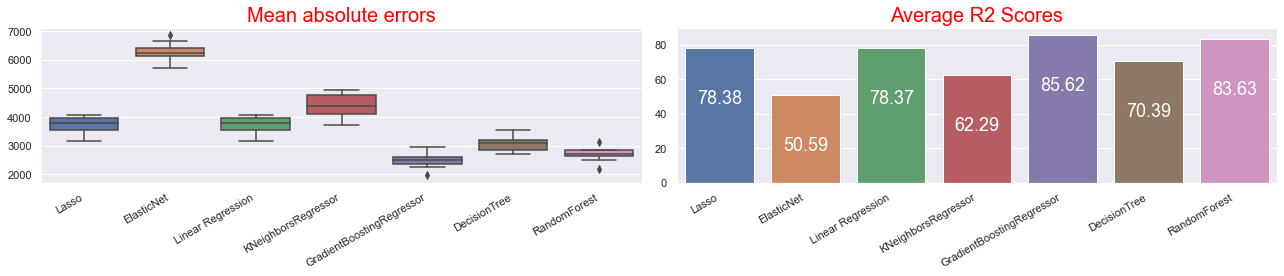

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(x=model_name, y=mae_score_lst, ax=axs[0])
axs[0].set_xticklabels(labels=model_name, rotation=30, horizontalalignment='right')
axs[0].set_title("Mean absolute errors", fontsize=20, color='red')

sns.barplot(x=model_name, y=avg_r2_scores, ax=axs[1])
axs[1].set_xticklabels(labels=model_name, rotation=30, horizontalalignment='right')
for p in axs[1].patches:
    axs[1].annotate(f'\n\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
axs[1].set_title("Average R2 Scores", fontsize=20, color='red')
    
plt.tight_layout()
plt.show()

# GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

## Select best model from Pipeline Evaluation

In [47]:
gbc = GradientBoostingRegressor()

In [48]:
pipe = Pipeline(steps=[
        ('prep', preprocessor), 
        ('model', gbc)
    ])

## Hyperparameters Tuning

In [49]:
parameters = {
    "model__n_estimators": [50, 100, 500, 1000],
    "model__max_depth": [1, 2, 4],
    "model__learning_rate": [0.001, 0.01, 0.1],
    'model__subsample':[0.68, 0.7, 0.72],
    'model__random_state':[1]
}

## Set up GridSearch

In [50]:
gridsearch = GridSearchCV(pipe, param_grid=parameters, cv=3, n_jobs=-1, scoring='r2')

## Fit GridSearch

In [51]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('OHE',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
  

## Best Parameters

In [52]:
gridsearch.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 2,
 'model__n_estimators': 1000,
 'model__random_state': 1,
 'model__subsample': 0.7}

## Gridsearch Evaluation

In [53]:
gridsearch.best_score_

0.8517837538303915

In [54]:
best_model = gridsearch.best_estimator_

In [55]:
avg_mae_best_model = -1*(np.mean((cross_val_score(best_model, X, y, cv=10, scoring='neg_mean_absolute_error'))))
avg_r2_best_model = np.mean((cross_val_score(best_model, X, y, cv=10, scoring='r2')))
print(f"Best Model's average MAE: {avg_mae_best_model}")
print(f"Best Model's average R2: {avg_r2_best_model}")

Best Model's average MAE: 2486.4361457239406
Best Model's average R2: 0.8592242602761168


## Evaluation Viz

In [56]:
y_pred_grid = best_model.predict(X_valid)

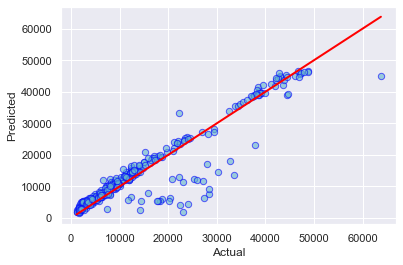

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_valid, y_pred_grid,edgecolors=(0, 0, 1), s=40, alpha=0.6, c='c')
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()